![Central-Park-Trees-Grove-of-American-Elms-Central-Park-Mall-Literary-Walk-Great-Trees-NYC10](Central-Park-Trees-Grove-of-American-Elms-Central-Park-Mall-Literary-Walk-Great-Trees-NYC10.jpg)


In [110]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy import stats
import  plotly.graph_objects as go
import plotly.express as px
import pandas as pd



## 💾 The data
The team has provided access to the 2015 tree census and geographical information on New York City neighborhoods ([trees](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh), [neighborhoods](https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz)):

#### Tree Census
- "tree_id" - Unique id of each tree.
- "tree_dbh" - The diameter of the tree in inches measured at 54 inches above the ground.
- "curb_loc" - Location of the tree bed in relation to the curb. Either along the curb (OnCurb) or offset from the curb (OffsetFromCurb).
- "spc_common" - Common name for the species.
- "status" - Indicates whether the tree is alive or standing dead.
- "health" - Indication of the tree's health (Good, Fair, and Poor).
- "root_stone" - Indicates the presence of a root problem caused by paving stones in the tree bed.
- "root_grate" - Indicates the presence of a root problem caused by metal grates in the tree bed.
- "root_other" - Indicates the presence of other root problems.
- "trunk_wire" - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk.
- "trnk_light" - Indicates the presence of a trunk problem caused by lighting installed on the tree.
- "trnk_other" - Indicates the presence of other trunk problems.
- "brch_light" - Indicates the presence of a branch problem caused by lights or wires in the branches.
- "brch_shoe" - Indicates the presence of a branch problem caused by shoes in the branches.
- "brch_other" - Indicates the presence of other branch problems.
- "postcode" - Five-digit zip code where the tree is located.
- "nta" - Neighborhood Tabulation Area (NTA) code from the 2010 US Census for the tree.
- "nta_name" - Neighborhood name.
- "latitude" - Latitude of the tree, in decimal degrees.
- "longitude" - Longitude of the tree, in decimal degrees.

#### Neighborhoods' geographical information
- "ntacode" - NTA code (matches Tree Census information).
- "ntaname" - Neighborhood name (matches Tree Census information).
- "geometry" - Polygon that defines the neighborhood.

_Tree census and neighborhood information from the City of New York [NYC Open Data](https://opendata.cityofnewyork.us/data/)._

In [111]:
import pandas as pd
import geopandas as gpd
trees = pd.read_csv('data/trees.csv')
trees

,tree_id,tree_dbh,curb_loc,spc_common,status,health,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,nta,nta_name,latitude,longitude
0,190422,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.770046,-73.984950
1,190426,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.770210,-73.985338
2,208649,9,OnCurb,American linden,Alive,Good,No,Yes,No,No,No,No,No,No,No,10019,MN15,Clinton,40.762724,-73.987297
3,193310,14,OnCurb,honeylocust,Alive,Good,No,No,Yes,No,No,Yes,No,No,Yes,10021,MN40,Upper East Side-Carnegie Hill,40.772171,-73.960456
4,199760,4,OnCurb,willow oak,Alive,Fair,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.782087,-73.980964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64224,208765,11,OnCurb,honeylocust,Alive,Good,No,No,Yes,No,No,No,No,No,No,10065,MN31,Lenox Hill-Roosevelt Island,40.763224,-73.960984
64225,170513,9,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10280,MN25,Battery Park City-Lower Manhattan,40.707884,-74.017598
64226,190040,10,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.786150,-73.971152
64227,191269,12,OnCurb,ginkgo,Alive,Good,No,No,No,No,No,No,No,No,No,10010,MN21,Gramercy,40.739270,-73.983960


In [112]:
trees.sample(10)

,tree_id,tree_dbh,curb_loc,spc_common,status,health,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,nta,nta_name,latitude,longitude
4024,213185,8,OffsetFromCurb,pin oak,Alive,Good,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.788057,-73.976770
33921,27689,9,OnCurb,honeylocust,Alive,Fair,Yes,No,No,No,No,Yes,No,No,No,10012,MN23,West Village,40.729764,-73.998465
15406,297109,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10021,MN40,Upper East Side-Carnegie Hill,40.769551,-73.964346
36712,40417,6,OnCurb,ginkgo,Alive,Good,No,No,No,No,No,No,No,No,No,10029,MN33,East Harlem South,40.789459,-73.952649
52206,106887,6,OnCurb,American linden,Alive,Fair,No,No,No,No,No,No,No,No,No,10025,MN12,Upper West Side,40.800172,-73.967323
31574,524897,11,OnCurb,white oak,Alive,Good,No,No,No,No,No,No,No,No,No,10014,MN23,West Village,40.734966,-74.010119
31946,539032,4,OnCurb,littleleaf linden,Alive,Good,No,No,No,No,No,No,No,No,No,10037,MN03,Central Harlem North-Polo Grounds,40.815507,-73.936432
33166,15055,2,OnCurb,Chinese elm,Alive,Fair,No,No,No,No,No,No,No,No,No,10033,MN36,Washington Heights South,40.847433,-73.933522
44578,99418,13,OnCurb,pin oak,Alive,Good,No,No,No,No,No,No,No,No,No,10027,MN06,Manhattanville,40.815609,-73.952975
58564,131152,8,OnCurb,littleleaf linden,Alive,Good,Yes,No,No,No,No,No,No,No,No,10025,MN12,Upper West Side,40.796403,-73.962281


In [113]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64229 entries, 0 to 64228
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tree_id     64229 non-null  int64  
 1   tree_dbh    64229 non-null  int64  
 2   curb_loc    64229 non-null  object 
 3   spc_common  62428 non-null  object 
 4   status      64229 non-null  object 
 5   health      62427 non-null  object 
 6   root_stone  64229 non-null  object 
 7   root_grate  64229 non-null  object 
 8   root_other  64229 non-null  object 
 9   trunk_wire  64229 non-null  object 
 10  trnk_light  64229 non-null  object 
 11  trnk_other  64229 non-null  object 
 12  brch_light  64229 non-null  object 
 13  brch_shoe   64229 non-null  object 
 14  brch_other  64229 non-null  object 
 15  postcode    64229 non-null  int64  
 16  nta         64229 non-null  object 
 17  nta_name    64229 non-null  object 
 18  latitude    64229 non-null  float64
 19  longitude   64229 non-nul

In [114]:
trees.isna().sum()

tree_id          0
tree_dbh         0
curb_loc         0
spc_common    1801
status           0
health        1802
root_stone       0
root_grate       0
root_other       0
trunk_wire       0
trnk_light       0
trnk_other       0
brch_light       0
brch_shoe        0
brch_other       0
postcode         0
nta              0
nta_name         0
latitude         0
longitude        0
dtype: int64

We have 64229 row of data so if we removed empty cells  it will make any sense to our results 

In [115]:
trees.dropna(inplace =True,axis = 0)

In [116]:
trees.isna().sum()

tree_id       0
tree_dbh      0
curb_loc      0
spc_common    0
status        0
health        0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
postcode      0
nta           0
nta_name      0
latitude      0
longitude     0
dtype: int64

In [117]:
neighborhoods = gpd.read_file('data/nta.shp')
neighborhoods.to_csv('nighb.csv')

In [118]:
neighborhoods.value_counts(['borocode'])

borocode
4.0         58
3.0         51
2.0         38
1.0         29
5.0         19
dtype: int64

In [119]:
neighborhoods.isna().sum()

borocode      0
boroname      0
countyfips    0
ntacode       0
ntaname       0
shape_area    0
shape_leng    0
geometry      0
dtype: int64

In [120]:
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   borocode    195 non-null    float64 
 1   boroname    195 non-null    object  
 2   countyfips  195 non-null    object  
 3   ntacode     195 non-null    object  
 4   ntaname     195 non-null    object  
 5   shape_area  195 non-null    float64 
 6   shape_leng  195 non-null    float64 
 7   geometry    195 non-null    geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 12.3+ KB


In [121]:


df = trees.merge(neighborhoods, left_on='nta_name', right_on='ntaname')


In [122]:
df.sample(10)

,tree_id,tree_dbh,curb_loc,spc_common,status,health,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,nta,nta_name,latitude,longitude,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
925,388387,5,OnCurb,Callery pear,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.771911,-73.990071,1.0,Manhattan,061,MN14,Lincoln Square,1.580567e+07,19866.053195,"POLYGON ((-73.97500 40.77753, -73.97546 40.776..."
25503,138395,32,OnCurb,American elm,Alive,Fair,Yes,No,No,No,No,No,No,No,No,10026,MN09,Morningside Heights,40.809255,-73.957217,1.0,Manhattan,061,MN09,Morningside Heights,2.015832e+07,20744.313555,"POLYGON ((-73.95210 40.81144, -73.95259 40.810..."
58455,125742,8,OnCurb,silver linden,Alive,Fair,Yes,No,No,No,No,No,No,No,No,10035,MN34,East Harlem North,40.798841,-73.938245,1.0,Manhattan,061,MN34,East Harlem North,2.449542e+07,30603.263852,"MULTIPOLYGON (((-73.92719 40.79735, -73.92735 ..."
37104,473681,0,OffsetFromCurb,cherry,Alive,Good,Yes,No,No,No,No,No,No,No,No,10002,MN28,Lower East Side,40.710378,-73.988260,1.0,Manhattan,061,MN28,Lower East Side,2.329762e+07,25469.235630,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ..."
50027,312777,13,OnCurb,Japanese zelkova,Alive,Good,No,No,No,No,No,No,No,No,No,10031,MN04,Hamilton Heights,40.829514,-73.943941,1.0,Manhattan,061,MN04,Hamilton Heights,1.609379e+07,17410.823299,"POLYGON ((-73.94035 40.83046, -73.94017 40.830..."
12108,119250,3,OnCurb,pin oak,Alive,Good,No,No,No,No,No,No,No,No,No,83,MN12,Upper West Side,40.784786,-73.969558,1.0,Manhattan,061,MN12,Upper West Side,3.438105e+07,29158.132669,"POLYGON ((-73.96003 40.79804, -73.96052 40.797..."
30037,37917,6,OnCurb,ginkgo,Alive,Fair,No,Yes,No,No,No,No,No,No,No,10019,MN17,Midtown-Midtown South,40.762189,-73.979936,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019206e+07,27035.738130,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
17539,525783,6,OnCurb,Callery pear,Alive,Good,No,No,No,No,No,No,No,No,No,10013,MN24,SoHo-TriBeCa-Civic Center-Little Italy,40.726811,-74.003371,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.485957e+07,24284.700443,"POLYGON ((-73.99260 40.72414, -73.99263 40.724..."
41402,190978,4,OnCurb,Sophora,Alive,Good,No,No,No,No,No,No,No,No,No,10028,MN32,Yorkville,40.774750,-73.944763,1.0,Manhattan,061,MN32,Yorkville,1.359478e+07,17409.210115,"MULTIPOLYGON (((-73.93805 40.78083, -73.93790 ..."
58680,125723,4,OnCurb,'Schubert' chokecherry,Alive,Good,No,No,No,No,No,No,No,No,No,10029,MN34,East Harlem North,40.798733,-73.943410,1.0,Manhattan,061,MN34,East Harlem North,2.449542e+07,30603.263852,"MULTIPOLYGON (((-73.92719 40.79735, -73.92735 ..."


In [123]:
df.isna().sum()

tree_id       0
tree_dbh      0
curb_loc      0
spc_common    0
status        0
health        0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
postcode      0
nta           0
nta_name      0
latitude      0
longitude     0
borocode      0
boroname      0
countyfips    0
ntacode       0
ntaname       0
shape_area    0
shape_leng    0
geometry      0
dtype: int64

In [124]:
df = df.drop(['ntaname'],axis = 1)

In [125]:
df.describe()

,tree_id,tree_dbh,postcode,latitude,longitude,borocode,shape_area,shape_leng
count,62427.000000,62427.000000,62427.000000,62427.000000,62427.000000,62427.0,6.242700e+04,62427.000000
mean,207179.703894,8.752431,9882.458455,40.779078,-73.967259,1.0,2.161054e+07,25743.381069
std,135610.787893,5.602473,1206.920231,0.040411,0.023664,0.0,7.109129e+06,7810.616753
min,356.000000,0.000000,83.000000,40.701790,-74.018360,1.0,5.575232e+06,11000.158745
25%,98120.500000,5.000000,10014.000000,40.745117,-73.985159,1.0,1.609379e+07,20744.313555
50%,190210.000000,8.000000,10025.000000,40.778256,-73.966039,1.0,2.015832e+07,24284.700443
75%,287296.000000,11.000000,10032.000000,40.806036,-73.947642,1.0,2.500053e+07,29385.030625
max,722674.000000,318.000000,10282.000000,40.873054,-73.911202,1.0,3.702973e+07,45700.005462


In [126]:
df.value_counts('status')

status
Alive    62427
dtype: int64

In [127]:
df.value_counts('health')

health
Good    47358
Fair    11460
Poor     3609
dtype: int64

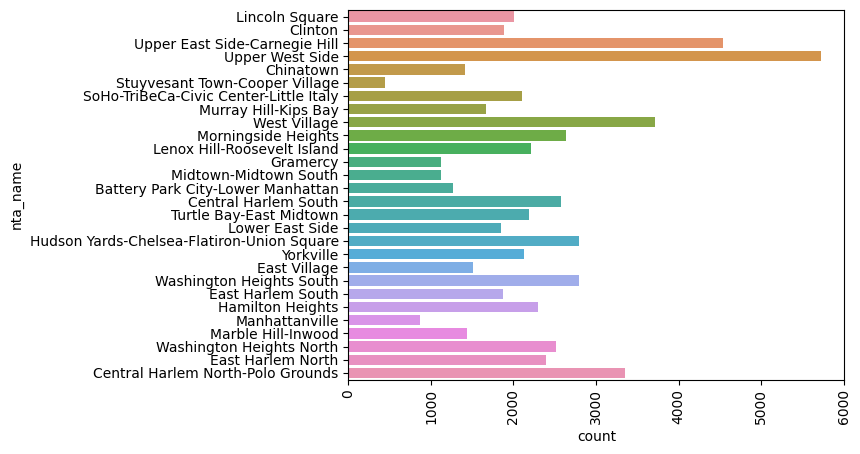

In [128]:
sns.countplot(y= 'nta_name',data = df);
plt.xticks(rotation=90);


## **What are the most common tree species in Manhattan?**

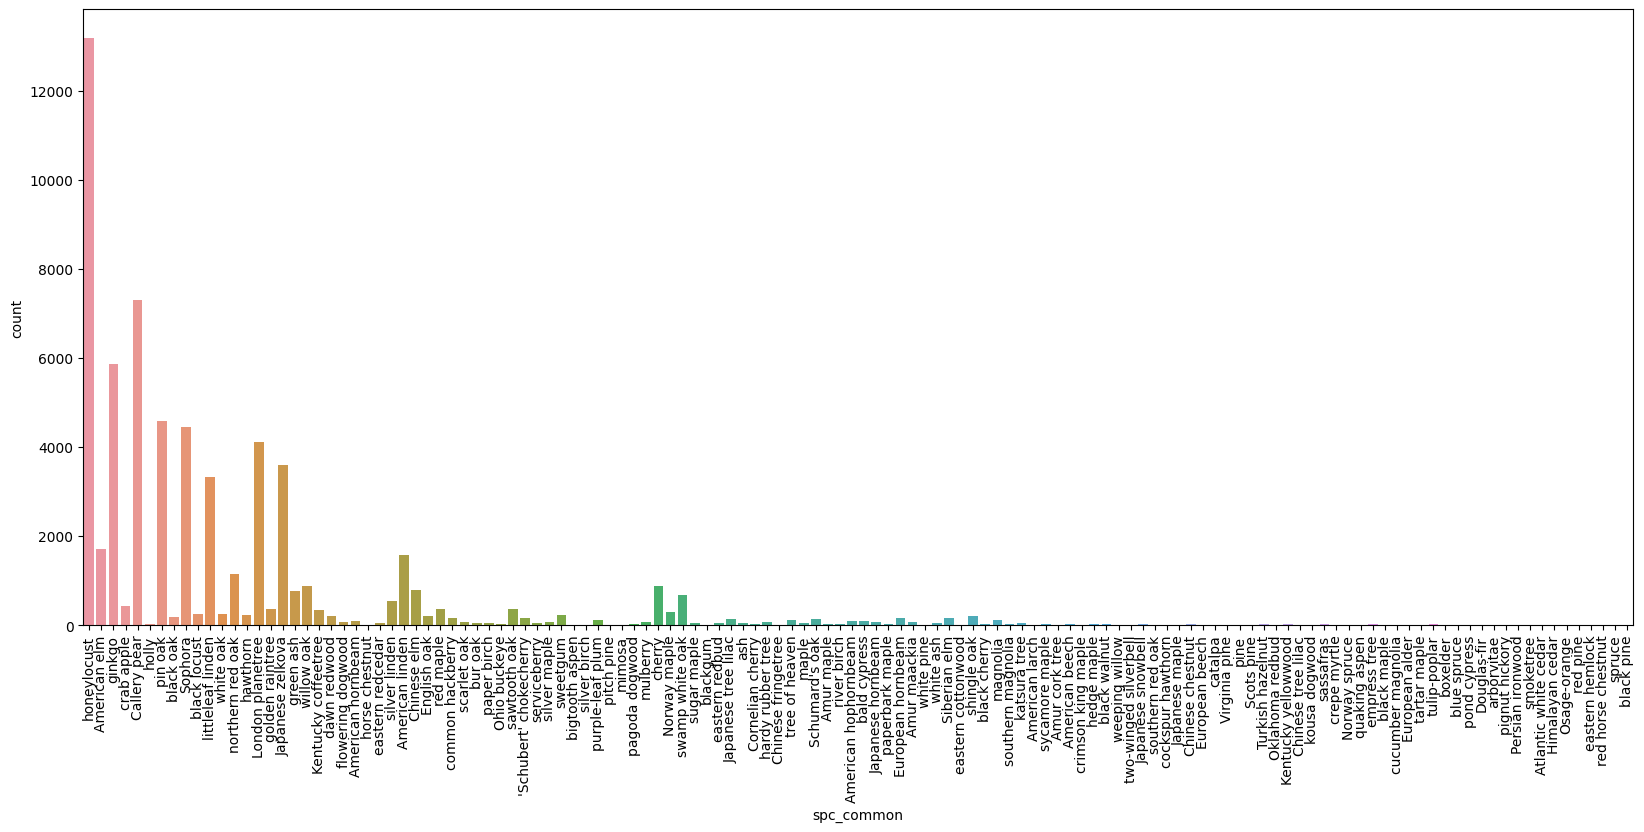

In [129]:
plt.figure(figsize=(20,8))


sns.countplot(x = 'spc_common',data = df);
plt.xticks(rotation=90);


## **Which are the neighborhoods with the most trees?**

In [38]:
MostNighTrees = df.groupby(["nta_name"])['tree_id'].count().sort_values(ascending=False).reset_index()[:20];
#sns.barplot(x = 'nta_name',y ='tree_id' ,data = MostNighTrees);
#plt.xticks(rotation=90);

,nta_name,tree_id
0,Upper West Side,5723
1,Upper East Side-Carnegie Hill,4540
2,West Village,3715
3,Central Harlem North-Polo Grounds,3355
4,Hudson Yards-Chelsea-Flatiron-Union Square,2797
5,Washington Heights South,2788
6,Morningside Heights,2642
7,Central Harlem South,2581
8,Washington Heights North,2519
9,East Harlem North,2398


### A visualization of Manhattan's neighborhoods and tree locations.

In [25]:
import geopandas as gpd


In [26]:
neighborhoods.head()


,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700..."
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861..."
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651..."


<AxesSubplot:>

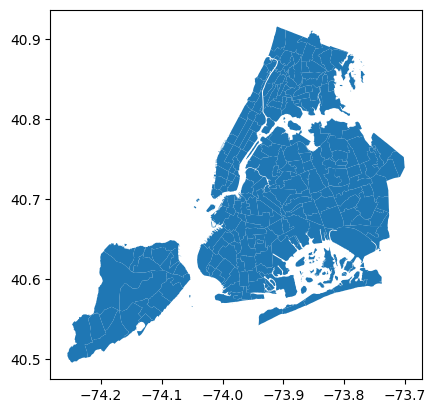

In [27]:
neighborhoods.plot()

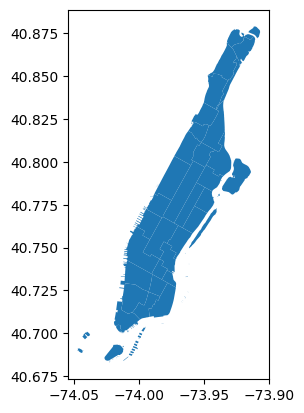

In [28]:
ManhattanNighbors =  neighborhoods[neighborhoods['boroname'] == 'Manhattan']
ax = ManhattanNighbors.plot();

In [136]:
#data.head()

In [137]:
#Manhattanland = data.loc[data.boroname.isin(['Manhattan'])].copy()
#Manhattanland.head()s

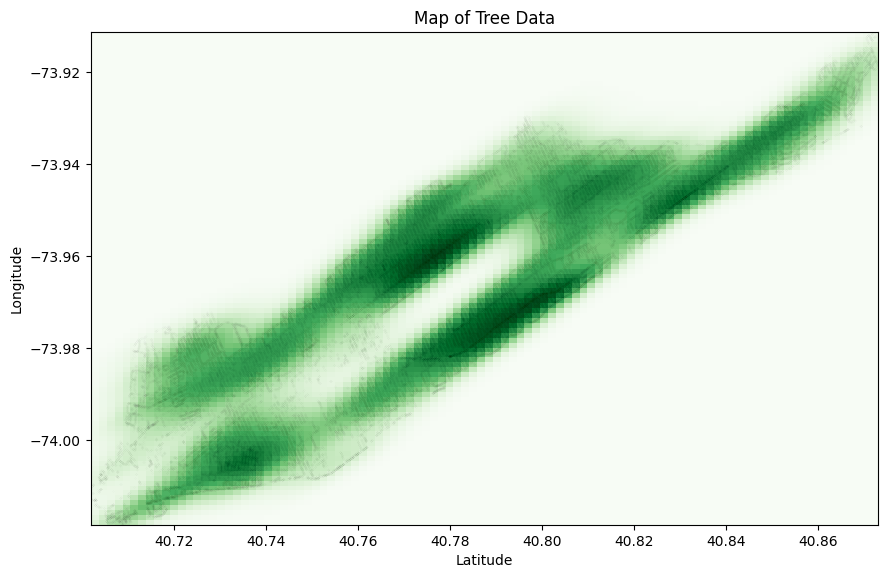

In [29]:
path = 'data/trees.csv'

df2 = pd.read_csv(path, usecols=['latitude', 'longitude'])
latitudes = df2.latitude.tolist()
longitudes = df2.longitude.tolist()
xmin, xmax = min(latitudes), max(latitudes)
ymin, ymax = min(longitudes), max(longitudes)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([latitudes, longitudes])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
fig = plt.figure()
fig.set_size_inches(30, fig.get_figwidth(), forward=True)
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.Greens,extent=[xmin, xmax, ymin, ymax])
ax.plot(latitudes, longitudes, 'k.', markersize=0.02)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_title("Map of Tree Data")
plt.show()

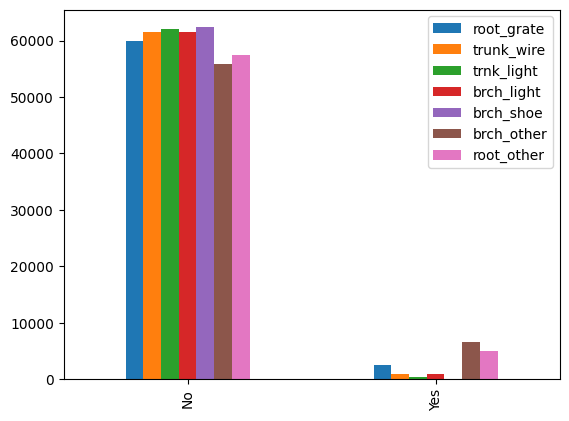

In [30]:
#df.groupby(['spc_common'])['root_grate','trunk_wire','trnk_light','brch_light','brch_shoe'].value_counts().sort_values(ascending = False)

df2 = df[['root_grate','trunk_wire','trnk_light','brch_light','brch_shoe',"brch_other",'root_other' ]]

df2.apply(pd.Series.value_counts).plot(kind='bar');



In [31]:
df['health'].value_counts()

Good    47358
Fair    11460
Poor     3609
Name: health, dtype: int64

In [32]:
goodTrees = df[(df['health'] =='Good') & (df['root_stone'] =='No') & (df['root_grate'] == 'No')& (df['root_other']=='No')
               & (df['trunk_wire']=='No')& (df['trnk_light']=='No')&(df['trnk_other']=='No') &(df['brch_light']=='No') &(df['brch_shoe']=='No')]

goodTrees.sample(20)
goodTrees.columns

Index(['tree_id', 'tree_dbh', 'curb_loc', 'spc_common', 'status', 'health',
       'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light',
       'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'postcode',
       'nta', 'nta_name', 'latitude', 'longitude', 'borocode', 'boroname',
       'countyfips', 'ntacode', 'shape_area', 'shape_leng', 'geometry'],
      dtype='object')

In [33]:
goodTrees.describe()

,tree_id,tree_dbh,postcode,latitude,longitude,borocode,shape_area,shape_leng
count,32610.000000,32610.000000,32610.000000,32610.000000,32610.000000,32610.0,3.261000e+04,32610.000000
mean,218544.461576,8.531892,9905.465532,40.778283,-73.968950,1.0,2.220349e+07,26116.955551
std,141843.768427,5.679413,1114.591119,0.040540,0.023872,0.0,7.661092e+06,8371.396299
min,395.000000,0.000000,83.000000,40.701790,-74.018360,1.0,5.575232e+06,11000.158745
25%,107508.250000,4.000000,10014.000000,40.742596,-73.986927,1.0,1.609379e+07,20744.313555
50%,191182.000000,8.000000,10025.000000,40.779932,-73.968460,1.0,2.150156e+07,24284.700443
75%,292009.750000,11.000000,10032.000000,40.806268,-73.948543,1.0,2.500053e+07,29158.132669
max,722671.000000,318.000000,10282.000000,40.873054,-73.911478,1.0,3.702973e+07,45700.005462


**Good tree its diameter is in avarage 8.5318920577**

In [34]:
goodTrees.groupby('spc_common')['tree_dbh'].agg([np.mean,np.median]).nlargest(12,'mean').reset_index()

,spc_common,mean,median
0,black maple,16.000000,18.0
1,London planetree,14.018358,14.0
2,Ohio buckeye,12.777778,12.0
3,American elm,12.527235,10.0
4,mulberry,12.366667,10.5
5,sycamore maple,12.083333,16.0
6,Siberian elm,11.153061,11.0
7,smoketree,11.000000,11.0
8,Norway maple,10.645833,9.0
9,tree of heaven,10.162162,6.0


In [48]:
# Alternative visualization

neighborhoods_n1 = gpd.read_file('data/nta.shp')
trees_n1 = pd.read_csv('data/trees.csv')

mnh = neighborhoods_n1[neighborhoods_n1.boroname == 'Manhattan']

sp_geo = gpd.GeoDataFrame(trees_n1, crs = {'init':'epsg:4236'}, geometry = gpd.points_from_xy(trees_n1.longitude, trees_n1.latitude))

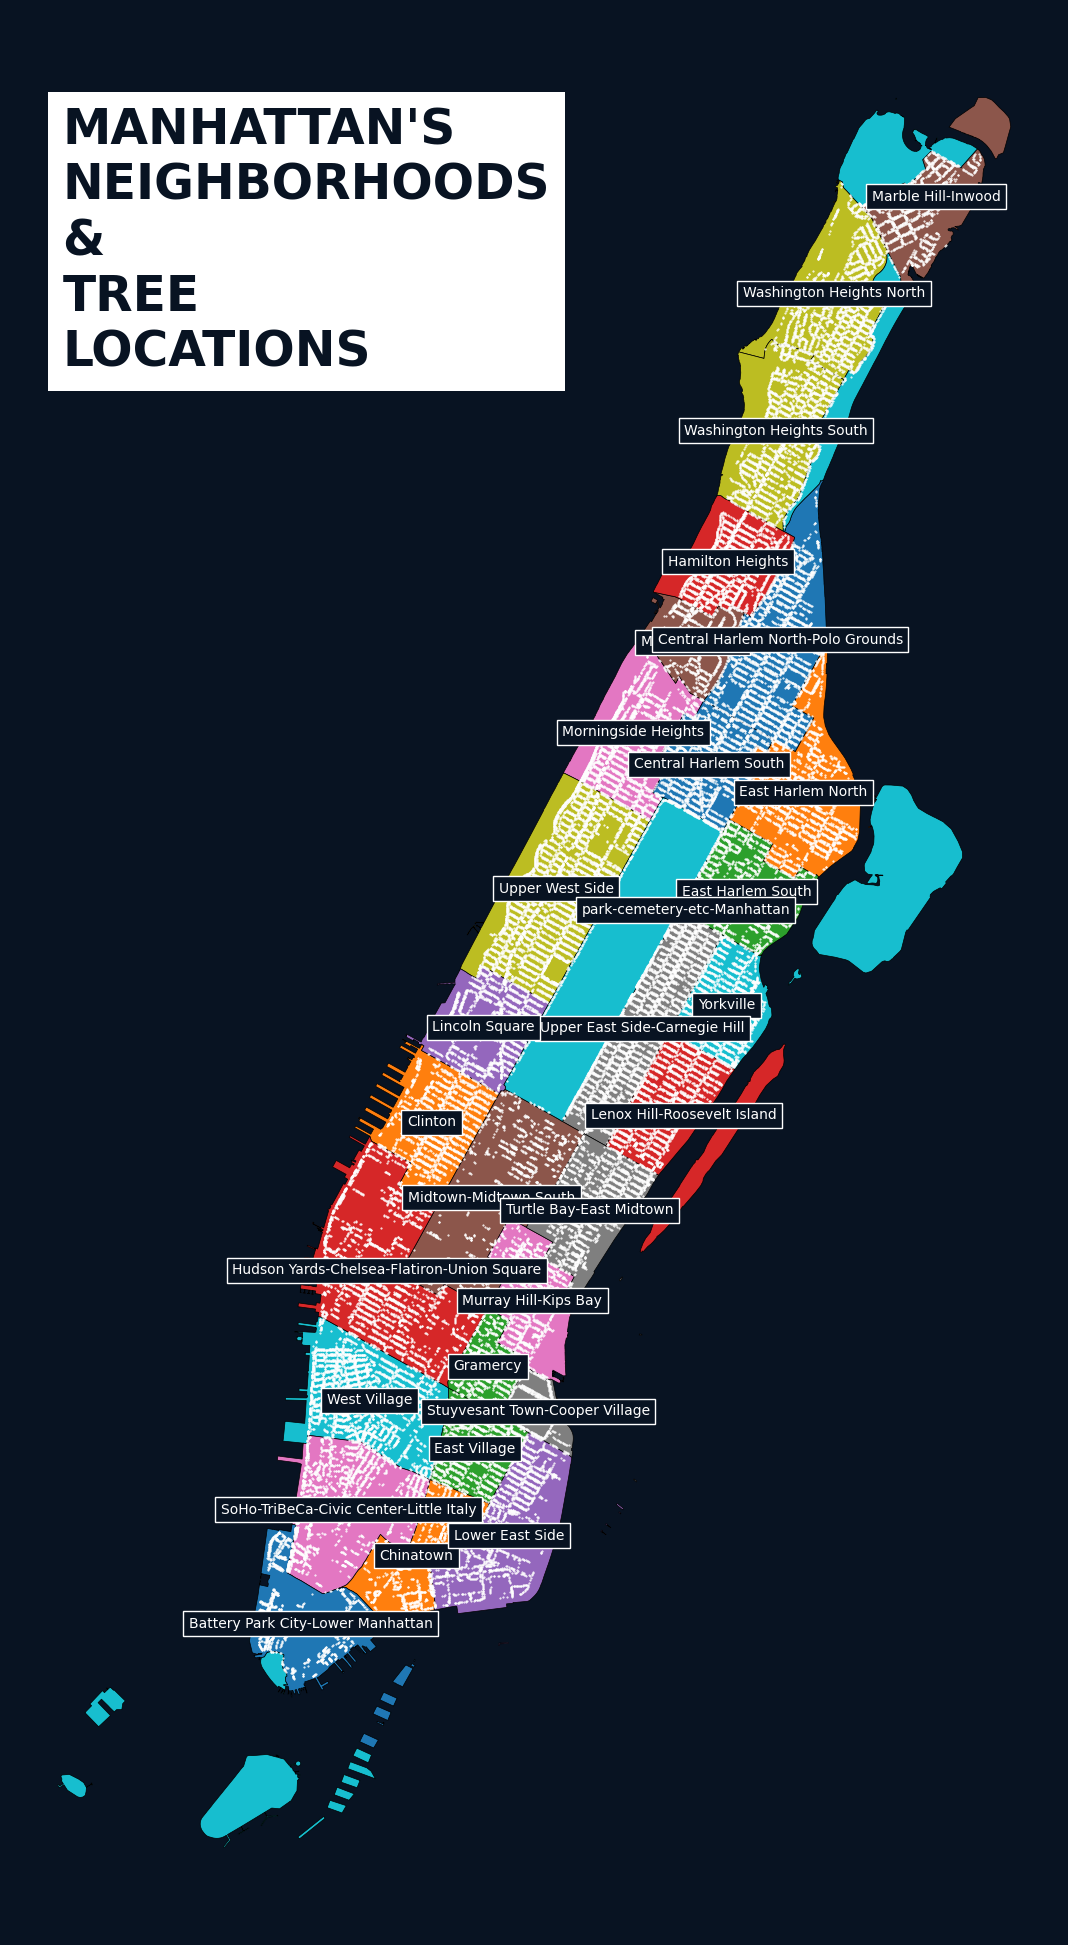

In [49]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 25))

fig.set_facecolor('#081322')

# Plot the neighborhoods
mnh.plot(ax = ax, column='ntaname', edgecolor='black', linewidth=0.5)

# Plot the tree locations
sp_geo.plot(ax = ax, marker='.', color='#FFFFFF', markersize=1)

# Create a list of labels for the legend
labels = mnh['ntaname'].unique()

# Remove the axis labels and ticks
ax.set_axis_off()

# Loop through each neighborhood in the DataFrame
for index, row in mnh.iterrows():
    # Get the neighborhood name and centroid
    name = row['ntaname']
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    
    # Add the neighborhood name to the plot
    ax.text(x, y, name, fontsize=10, color='white', ha='center', va='center', bbox=dict(facecolor='#081322', edgecolor='white'))


ax.text(0.05, 0.95, "MANHATTAN'S\nNEIGHBORHOODS\n&\nTREE\nLOCATIONS", fontsize=35, color='#081322', ha='left', va='top', transform=ax.transAxes, fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', boxstyle='square', pad=0.3))



# Show the plot
plt.show()



# Conclousion:
# Honeylocust is the most common tree species in Manhattan
# 
# Upper West Side is the most neighbor have trees with number of trees equal to 5723 tree
# 
# There exist 47358 Good Tree , 11460 Fair and 3609 **Poor**